# IMPORTS

In [541]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from math import sqrt

# PREPROCESSING
Importing dataset

In [542]:
housedf = pd.read_csv('housing.csv')

Printing head

In [543]:
print(housedf.head(10))

      price   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000   7420         4          2        3      yes        no       no   
1  12250000   8960         4          4        4      yes        no       no   
2  12250000   9960         3          2        2      yes        no      yes   
3  12215000   7500         4          2        2      yes        no      yes   
4  11410000   7420         4          1        2      yes       yes      yes   
5  10850000   7500         3          3        1      yes        no      yes   
6  10150000   8580         4          3        4      yes        no       no   
7  10150000  16200         5          3        2      yes        no       no   
8   9870000   8100         4          1        2      yes       yes      yes   
9   9800000   5750         3          2        4      yes       yes       no   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      

Getting more info

In [544]:
housedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


Getting statistics info

In [545]:
housedf.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Checking nulls in dataset

In [606]:
housedf.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Checking unique values of categorical data

In [546]:
for col in housedf.select_dtypes(include=['object']).columns:
    print(f'Column - {col} - unique values: {housedf[col].unique()}')

Column - mainroad - unique values: ['yes' 'no']
Column - guestroom - unique values: ['no' 'yes']
Column - basement - unique values: ['no' 'yes']
Column - hotwaterheating - unique values: ['no' 'yes']
Column - airconditioning - unique values: ['yes' 'no']
Column - prefarea - unique values: ['yes' 'no']
Column - furnishingstatus - unique values: ['furnished' 'semi-furnished' 'unfurnished']


Handling categorical data

In [547]:
dummies_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for col in dummies_cols:
    housedf[col] = pd.get_dummies(housedf[col], drop_first=True).astype(int)

In [548]:
encoder_furnstat = LabelEncoder()
encoded_data = encoder_furnstat.fit_transform(housedf['furnishingstatus'])

In [549]:
housedf['furnishingstatus'] = encoded_data

# VISUALIZING
Distribution of prices

1750000
5417999.999999998
13300000


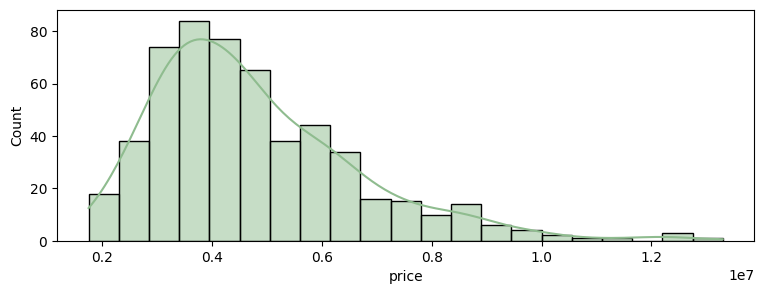

In [611]:
plt.figure(figsize=(9,3))
sns.histplot(data=housedf, x='price', kde=True, color='darkseagreen')
print(housedf['price'].min())
print(housedf['price'].quantile(0.70))
print(housedf['price'].max())

Relation of price and number of bathrooms

Text(0.5, 1.0, 'Price x Bathrooms')

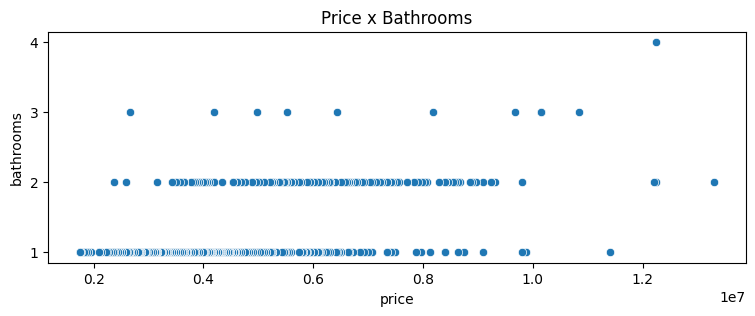

In [551]:
plt.figure(figsize=(9,3))
sns.scatterplot(data=housedf, x='price', y='bathrooms')
plt.yticks(range(1,5,1))
plt.title('Price x Bathrooms')

Relation of area and price

Text(0.5, 1.0, 'Price x Area')

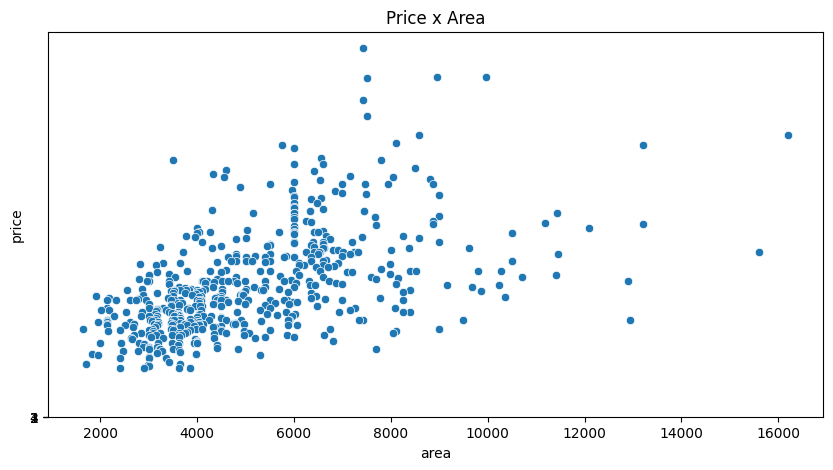

In [552]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=housedf, x='area', y='price')
plt.yticks(range(1,5,1))
plt.title('Price x Area')

Correlation map

Text(0.5, 1.0, 'Correlation Map')

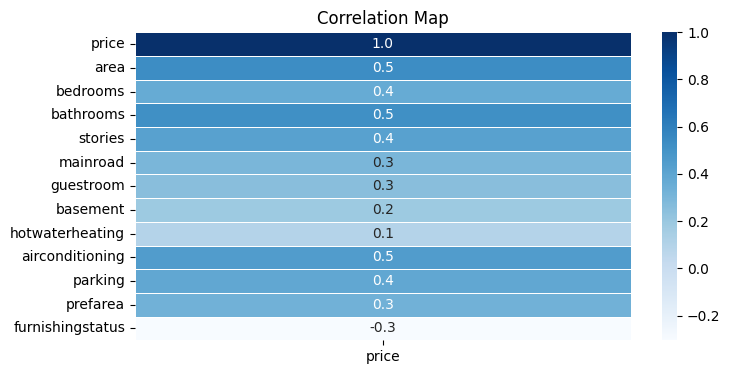

In [553]:
plt.figure(figsize=(8,4))
sns.heatmap(data=housedf.corr()['price'].to_frame(), annot=True, linewidths=0.6, cmap='Blues', fmt='.1f')
plt.title('Correlation Map')

# AI
Checking shape to decide test_size

In [554]:
housedf.shape

(545, 13)

Separating data

In [555]:
X = housedf.drop(['price', 'furnishingstatus'], axis=1)
y = housedf['price']

In [556]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [599]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=50)

In [600]:
rfr = RandomForestRegressor()

In [601]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [602]:
predictions = rfr.predict(X_test)

In [603]:
rmse = sqrt(mean_squared_error(y_test, predictions))
print("Root Mean Squared Error:", round(rmse, 2))

Root Mean Squared Error: 979655.41


In [604]:
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae.round(2))

Mean Absolute Error: 756341.57


In [605]:
r2 = r2_score(y_test, predictions)
print("R-squared:", r2.round(2))

R-squared: 0.72
